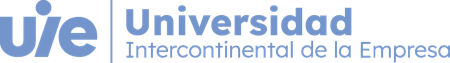

**G24GXX3.10X. Aprendizaje Automático**

**Profesor: Borja González Seoane**

Curso 2024-25

In [1]:
__author__ = "Mateo Delgado"

# PL07. Tres en Raya con Aprendizaje por Refuerzo

En esta primera parte de la práctica evaluada tercera de la asignatura, se va a implementar un juego de tres en raya inteligente mediante aprendizaje por refuerzo desde cero (_scratch_). La implementación debe permitir:

1. Entrenar un agente máquina confrotándolo contra otro agente máquina.
2. Persistir la experiencia del agente a almacenamiento secundario.
3. Cargar la experiencia de un agente para recuperar su conocimiento previo.
4. Jugar contra el agente entrenado (máquina vs. humano).

Pártase de los materiales dispuestos en el Campus Virtual y revísense los `#TODO` anotados en el código.


In [2]:
from pathlib import Path
import sys

In [3]:

ARTEFACTOS_PATH = ("./artefactos")


## Recuperamos las implementaciones de los módulos Python correspondientes

In [4]:
# Añade el directorio `src` del repo al `path`
sys.path.append(".")

from apr_tres_en_raya_scratch import (
    JuegoTresEnRaya,
    JugadorTresEnRayaHum,
    JugadorTresEnRayaMaq,
)

## Entrena un jugador máquina contra otro jugador máquina

### 100 rondas de entrenamiento

In [5]:
# Crear instancias de los jugadores
jugador1 = JugadorTresEnRayaMaq(nombre="Máquina1")
jugador2 = JugadorTresEnRayaMaq(nombre="Máquina2")

# Crear una instancia del juego
juego = JuegoTresEnRaya(jugador1, jugador2)

# Realizar 100 rondas de entrenamiento
n_rondas = 100
juego.fit(rondas=n_rondas)

Partida 0
Partida 10
Partida 20
Partida 30
Partida 40
Partida 50
Partida 60
Partida 70
Partida 80
Partida 90


In [6]:
# Guardamos la política de la máquina entrenada
jugador1.guarda_politica(Path(ARTEFACTOS_PATH) / f"apr_tres_en_raya_{n_rondas}.yml")

## Más rondas

In [7]:
# Crear instancias de los jugadores
jugador1 = JugadorTresEnRayaMaq(nombre="Máquina1")
jugador2 = JugadorTresEnRayaMaq(nombre="Máquina2")

# Crear una instancia del juego
juego = JuegoTresEnRaya(jugador1, jugador2)

# Realizar n rondas de entrenamiento
n_rondas = 20000
juego.fit(rondas=n_rondas)

Partida 0
Partida 10
Partida 20
Partida 30
Partida 40
Partida 50
Partida 60
Partida 70
Partida 80
Partida 90
Partida 100
Partida 110
Partida 120
Partida 130
Partida 140
Partida 150
Partida 160
Partida 170
Partida 180
Partida 190
Partida 200
Partida 210
Partida 220
Partida 230
Partida 240
Partida 250
Partida 260
Partida 270
Partida 280
Partida 290
Partida 300
Partida 310
Partida 320
Partida 330
Partida 340
Partida 350
Partida 360
Partida 370
Partida 380
Partida 390
Partida 400
Partida 410
Partida 420
Partida 430
Partida 440
Partida 450
Partida 460
Partida 470
Partida 480
Partida 490
Partida 500
Partida 510
Partida 520
Partida 530
Partida 540
Partida 550
Partida 560
Partida 570
Partida 580
Partida 590
Partida 600
Partida 610
Partida 620
Partida 630
Partida 640
Partida 650
Partida 660
Partida 670
Partida 680
Partida 690
Partida 700
Partida 710
Partida 720
Partida 730
Partida 740
Partida 750
Partida 760
Partida 770
Partida 780
Partida 790
Partida 800
Partida 810
Partida 820
Partida 830
Par

In [8]:
jugador1.guarda_politica(Path(ARTEFACTOS_PATH) / f"apr_tres_en_raya_{n_rondas}.yml")

## Máquina vs. humano

Se prueba la mejor versión de agente máquina entrenada.

In [9]:
pesos_mejor_politica = "apr_tres_en_raya_20000.yml"

In [10]:
# Recuperamos la mejor máquina entrenada
jugador_maq1_mejor = JugadorTresEnRayaMaq("Mejor máquina")
jugador_maq1_mejor.carga_politica(Path(ARTEFACTOS_PATH) / pesos_mejor_politica)

# Jugamos contra la máquina entrenada
juego_test = JuegoTresEnRaya(jugador_maq1_mejor, JugadorTresEnRayaHum(__author__))
juego_test.jugar()

-------------
|   |   |   | 
-------------
|   |   | x | 
-------------
|   |   |   | 
-------------
Posiciones libres: [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (2, 0), (2, 1), (2, 2)]
-------------
| o |   |   | 
-------------
|   |   | x | 
-------------
|   |   |   | 
-------------
-------------
| o |   |   | 
-------------
| x |   | x | 
-------------
|   |   |   | 
-------------
Posiciones libres: [(0, 1), (0, 2), (1, 1), (2, 0), (2, 1), (2, 2)]
-------------
| o |   |   | 
-------------
| x | o | x | 
-------------
|   |   |   | 
-------------
-------------
| o |   |   | 
-------------
| x | o | x | 
-------------
|   |   | x | 
-------------
Posiciones libres: [(0, 1), (0, 2), (2, 0), (2, 1)]
Entrada no válida. Inténtelo de nuevo...
-------------
| o |   |   | 
-------------
| x | o | x | 
-------------
|   | o | x | 
-------------
-------------
| o |   | x | 
-------------
| x | o | x | 
-------------
|   | o | x | 
-------------
¡Ha ganado el jugador Mejor máquina!
-----------